# 6.4 Exercises

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy.contrasts import Treatment

## Exercise 1: Loading the Data

For today's exercise we will use the Cleveland Heart Disease dataset. It is a well-known dataset in the field of medical research and machine learning, particularly used for predicting heart disease. The dataset contains data collected from patients with suspected heart disease and includes various clinical and demographic attributes.


1. Please [visit the documentation](https://archive.ics.uci.edu/dataset/45/heart+disease) and familiarize yourself with the dataset.
2. Find the instructions for importing the data in Python. You can remove the printing of the metadata and variables, as this looks horrible in the notebook. Read it in the documentation instead.
3. Create a combined DataFrame, which combines the features and the targets along the first axis: `pd.concat([X, y], axis=1)`.
4. Please check if your data is how you expect it to be. You can use functions like `.describe()` or `.head()`.

In [11]:
# Exercise 1
#! pip install ucimlrepo

#from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)
print(df.head())




   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


## Exercise 2: Visualizing the Data

Plot `age` against the diferent types of chest pain (`cp`) using `sns.boxplot()`. Incorporate the diagnosis of heart disease (`num`) as the `hue`. Add the axis labels and a title.

*Additional information: Remember that patients without heart disease will have num = 0, while those with heart disease will have values ranging from 1 to 4.*

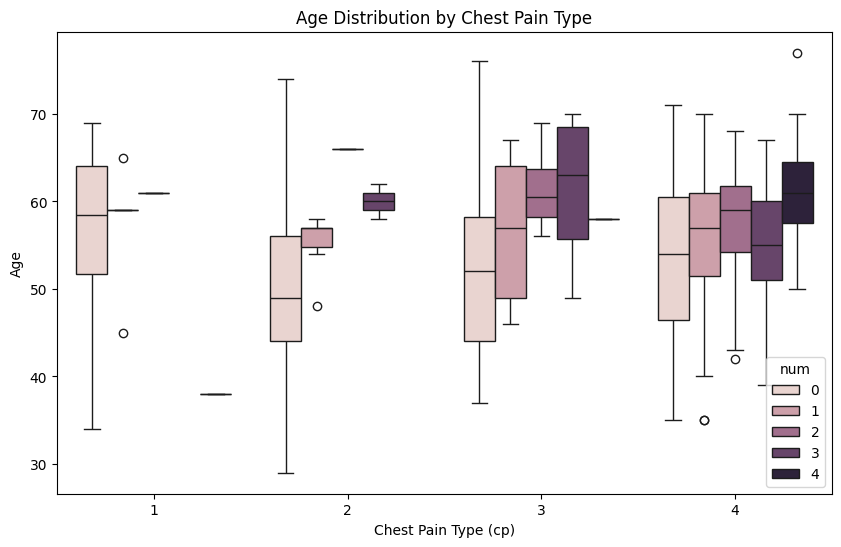

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = "cp", y = "age", hue = "num", data = df)

plt.title('Age Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Age')
plt.show()

## Exercise 3: Dummy Coding

Perform categorical regression with `cp` as the outcome variable and `age` as the predictors. For this:

1. In the documentation, inspect the "Additional Variable Information" to find out about the different levels of chest pain
2. Convert chest pain into a categorical variable
3. Apply a dummy coding scheme with typical angina as the reference category
4. Discuss the following points:
    - What do the coefficients tell you about the relationship between age and different types of chest pain?
    - Considering the explained variance and significance. Do the results suggest a relationship between chest pain type and age? Why or why not?

In [21]:
# Exercise 3
#  9 cp: chest pain type
 #       -- Value 1: typical angina
  #      -- Value 2: atypical angina
   #     -- Value 3: non-anginal pain
    #    -- Value 4: asymptomatic

df['cp'] = df['cp'].astype('category')
print(df["cp"].dtypes)



model = smf.ols('age ~ C(cp, Treatment(reference=1))', data=df)
results = model.fit()
print(results.summary())




category
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.364
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0191
Time:                        12:23:48   Log-Likelihood:                -1091.5
No. Observations:                 303   AIC:                             2191.
Df Residuals:                     299   BIC:                             2206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## Exercise 4: Weighted Effects Coding

1. Create a weighted effects coding contrast matrix with `age` as the outcome variable and `cp` as the predictors. Use 1 (typical angina) as the reference category, as in the previous steps.
2. Perform linear regression using `ols()` from `Statsmodels` with the weighted effects coding matrix.
3. Compare and interpret the results against the previous dummy coding approach, specifically focusing on the impact of using a weighted reference category versus an unweighted reference. How does the weighting affect the interpretation of the relationship between cp and age?

In [28]:
# Exercise 4
# Get all genotype levels and save them as a list
levels = df['cp'].cat.categories.tolist()


cp_counts = df['cp'].value_counts(sort=False)
counts = cp_counts.values

print("CP Levels:", levels)
print("Counts:", counts)


CP Levels: [1, 2, 3, 4]
Counts: [ 23  50  86 144]


## Voluntary exercise 1

With the model as previously designed in Exercise 2:

1. Manually create the contrast matrix and print it
2. Create and print the design matrix

*Hint: You can create the design matrix from the contrast matrix, but you need to map each level in `cp` to the corresponding contrast row: `cp_mapping = {level: idx for idx, level in enumerate(levels)}`.*



In [ ]:
# Voluntary exercise 1

## Voluntary exercise 2

Implement contrast coding on the heart disease data set. There are no constraints, feel free to explore any contrasts.

In [ ]:
# Voluntary exercise 2